In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

In [2]:
dfCV = pd.read_csv('WA_Fn-UseC_-Marketing-Customer-Value-Analysis.csv')

In [3]:
dfCV.shape

dfCV.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [4]:
dfCV.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

# 相關與迴歸

In [5]:
from sklearn.linear_model import LinearRegression


In [6]:
y = dfCV["Customer Lifetime Value"]

Xcolumns = [
    'Income',
    'Monthly Premium Auto',
    'Months Since Last Claim',
    'Months Since Policy Inception',
    'Number of Open Complaints',
    'Number of Policies',
    'Total Claim Amount',
]

X = dfCV[Xcolumns]

all_features = Xcolumns + ["Customer Lifetime Value"]

all_features

['Income',
 'Monthly Premium Auto',
 'Months Since Last Claim',
 'Months Since Policy Inception',
 'Number of Open Complaints',
 'Number of Policies',
 'Total Claim Amount',
 'Customer Lifetime Value']

## 相關分析

In [7]:
dfCV[all_features].corr()

,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount,Customer Lifetime Value
Income,1.000000,-0.016665,-0.026715,-0.000875,0.006408,-0.008656,-0.355254,0.024366
Monthly Premium Auto,-0.016665,1.000000,0.005026,0.020257,-0.013122,-0.011233,0.632017,0.396262
Months Since Last Claim,-0.026715,0.005026,1.000000,-0.042959,0.005354,0.009136,0.007563,0.011517
Months Since Policy Inception,-0.000875,0.020257,-0.042959,1.000000,-0.001158,-0.013333,0.003335,0.009418
Number of Open Complaints,0.006408,-0.013122,0.005354,-0.001158,1.000000,0.001498,-0.014241,-0.036343
Number of Policies,-0.008656,-0.011233,0.009136,-0.013333,0.001498,1.000000,-0.002354,0.021955
Total Claim Amount,-0.355254,0.632017,0.007563,0.003335,-0.014241,-0.002354,1.000000,0.226451
Customer Lifetime Value,0.024366,0.396262,0.011517,0.009418,-0.036343,0.021955,0.226451,1.000000


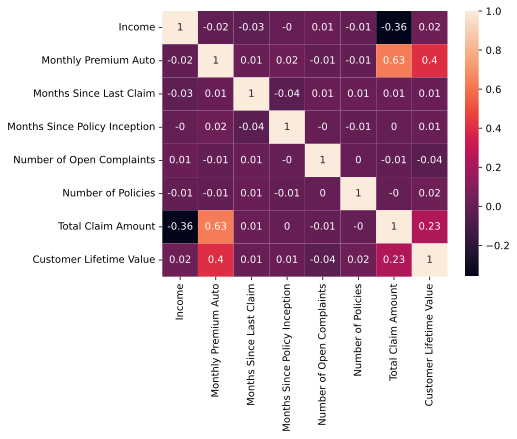

In [8]:
sns.heatmap(data=dfCV[all_features].corr().round(2), annot=True)
plt.show()


建立線性模型。

In [9]:
regr_model = LinearRegression()

訓練模型。

In [10]:
regr_model.fit(X, y)

LinearRegression()

查看模型系數。

In [11]:
regr_model.coef_.round(decimals=2)

array([   0.  ,   82.68,    6.99,    0.47, -238.05,   76.78,   -0.66])

查看模型截距。

In [12]:
intercept = regr_model.intercept_
assert isinstance(intercept, float)

round(intercept, 2)

np.float64(131.41)

模型 X 值與係數。

In [13]:
fea_coef = pd.DataFrame({
    'features': Xcolumns,
    'coef': regr_model.coef_.round(2)
})

模型分數。

In [14]:
regr_model.score(X, y)

0.1601631611137263

## 問題：請比較 `regr_model` 模型係數值與變數相關值。

In [15]:
# 模型係數值
fea_coef

,features,coef
0,Income,0.00
1,Monthly Premium Auto,82.68
2,Months Since Last Claim,6.99
3,Months Since Policy Inception,0.47
4,Number of Open Complaints,-238.05
5,Number of Policies,76.78
6,Total Claim Amount,-0.66


In [16]:
# 變數相關值
dfCV[all_features].corr().round(2)

,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount,Customer Lifetime Value
Income,1.00,-0.02,-0.03,-0.00,0.01,-0.01,-0.36,0.02
Monthly Premium Auto,-0.02,1.00,0.01,0.02,-0.01,-0.01,0.63,0.40
Months Since Last Claim,-0.03,0.01,1.00,-0.04,0.01,0.01,0.01,0.01
Months Since Policy Inception,-0.00,0.02,-0.04,1.00,-0.00,-0.01,0.00,0.01
Number of Open Complaints,0.01,-0.01,0.01,-0.00,1.00,0.00,-0.01,-0.04
Number of Policies,-0.01,-0.01,0.01,-0.01,0.00,1.00,-0.00,0.02
Total Claim Amount,-0.36,0.63,0.01,0.00,-0.01,-0.00,1.00,0.23
Customer Lifetime Value,0.02,0.40,0.01,0.01,-0.04,0.02,0.23,1.00


# 標準化後再進行回歸

## 標準化

In [17]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X, y)

X_scaled

array([[ 0.61282744, -0.70392465,  1.67809933, ..., -0.42224956,
        -0.82264788, -0.16963969],
       [-1.23961684,  0.02269103, -0.2081864 , ..., -0.42224956,
         2.10615996,  2.400737  ],
       [ 0.36570978,  0.42959581,  0.28820458, ..., -0.42224956,
        -0.40424676,  0.45573376],
       ...,
       [-1.23961684, -0.23889062, -0.60529919, ...,  2.87324529,
        -0.40424676,  1.22793667],
       [-0.51735647,  0.08082028,  1.87665573, ..., -0.42224956,
         0.01415436,  0.88511256],
       [-1.23961684, -0.47140763, -1.20096836, ..., -0.42224956,
        -0.82264788, -0.22200449]])

In [18]:
regr_model.fit(X_scaled, y)

LinearRegression()

In [19]:
# 模型係數

regr_model.coef_.round(decimals=2)

array([ 151.72, 2844.59,   70.37,   13.08, -216.71,  183.52, -191.31])

In [20]:
# 模型截距

intercept = regr_model.intercept_
assert isinstance(intercept, float)

round(intercept, 2)

np.float64(8004.94)

In [21]:
# 模型 X 值與係數

fea_coef_scaled = pd.DataFrame({
    'features': Xcolumns,
    'coef': regr_model.coef_.round(2)
})

fea_coef_scaled

,features,coef
0,Income,151.72
1,Monthly Premium Auto,2844.59
2,Months Since Last Claim,70.37
3,Months Since Policy Inception,13.08
4,Number of Open Complaints,-216.71
5,Number of Policies,183.52
6,Total Claim Amount,-191.31


In [22]:
# 模型分數

regr_model.score(X_scaled, y)

0.1601631611137263

## 問題：請比較 `regr_models` 模型係數值與變數相關值